In [1]:
# Krigging

In [2]:
from volumetricspy.stats import Dot,CloudPoints, Exponential, NScaler
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix

In [3]:
x = [0,1,2,0,0,2]
y = [0,0,0,1,2,2]
v = [1,2,4,5,6,27]

dfp = pd.DataFrame({"x":x,"y":y,"v":v})

cp = CloudPoints().from_df(dfp, x='x',y='y',fields=['v'])
cp.df()

,x,y,z,crs,v,geometry
0,0.0,0.0,None,None,1.0,POINT (0.00000 0.00000)
0,1.0,0.0,None,None,2.0,POINT (1.00000 0.00000)
0,2.0,0.0,None,None,4.0,POINT (2.00000 0.00000)
0,0.0,1.0,None,None,5.0,POINT (0.00000 1.00000)
0,0.0,2.0,None,None,6.0,POINT (0.00000 2.00000)
0,2.0,2.0,None,None,27.0,POINT (2.00000 2.00000)


<AxesSubplot:xlabel='x', ylabel='y'>

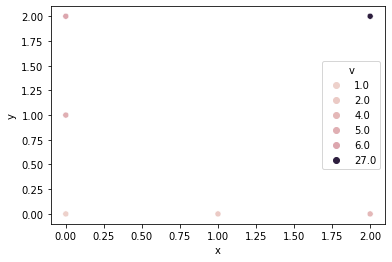

In [4]:
cp.plot(hue='v')

In [5]:
xu = [1,2,1,2,4,-1,8]
yu = [1,1,2,2,4,-1,8]
dfu = pd.DataFrame({"x":xu,"y":yu})
cpu = CloudPoints().from_df(dfu, x='x',y='y')
cpu.df()

,x,y,z,crs,geometry
0,1.0,1.0,None,None,POINT (1.00000 1.00000)
0,2.0,1.0,None,None,POINT (2.00000 1.00000)
0,1.0,2.0,None,None,POINT (1.00000 2.00000)
0,2.0,2.0,None,None,POINT (2.00000 2.00000)
0,4.0,4.0,None,None,POINT (4.00000 4.00000)
0,-1.0,-1.0,None,None,POINT (-1.00000 -1.00000)
0,8.0,8.0,None,None,POINT (8.00000 8.00000)


<AxesSubplot:>

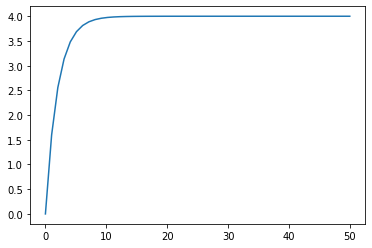

In [6]:
s = Exponential(
    sill = 4.,
    range = 2,
    nugget = 0.
)

s.plot(np.linspace(0,50,50))

<AxesSubplot:xlabel='x', ylabel='y'>

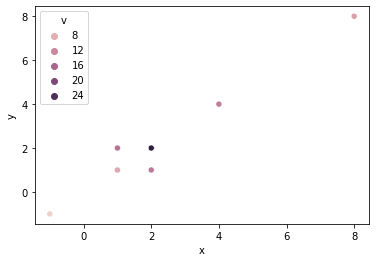

In [7]:
wm = s.ordinary_kriging(cp,cpu,v='v')

wm.plot('v')

/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:163: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  d = ax.pcolormesh(xx,yy,df.values, **kwargs)


<AxesSubplot:xlabel='x', ylabel='y'>

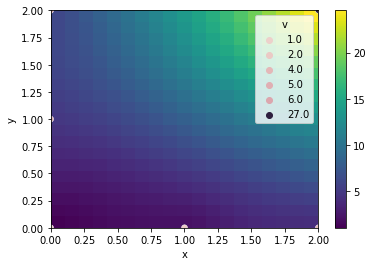

In [8]:
xn = np.linspace(0,2,20)
yn = np.linspace(0,2,20)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')
wm = s.ordinary_kriging(cp,cp2,v='v')

wm.plot_mesh('v')
cp.plot(hue='v')

In [9]:
wm.df()

,x,y,z,crs,v,v_variance,geometry
0,0.0,0.000000,None,None,1.000000,0.000000e+00,POINT (0.00000 0.00000)
0,0.0,0.105263,None,None,1.441686,3.719840e-01,POINT (0.00000 0.10526)
0,0.0,0.210526,None,None,1.886225,6.504408e-01,POINT (0.00000 0.21053)
0,0.0,0.315789,None,None,2.331614,8.406637e-01,POINT (0.00000 0.31579)
0,0.0,0.421053,None,None,2.774926,9.459013e-01,POINT (0.00000 0.42105)
...,...,...,...,...,...,...,...
0,2.0,1.578947,None,None,20.812411,1.245866e+00,POINT (2.00000 1.57895)
0,2.0,1.684211,None,None,22.269877,1.010257e+00,POINT (2.00000 1.68421)
0,2.0,1.789474,None,None,23.784459,7.266798e-01,POINT (2.00000 1.78947)
0,2.0,1.894737,None,None,25.359879,3.913852e-01,POINT (2.00000 1.89474)


In [10]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df2 = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
dcp2 = CloudPoints().from_df(df2, x='X',y='Y', fields=['Facies','Porosity','Perm'])
dcp2.df()

,x,y,z,crs,Facies,Porosity,Perm,geometry
0,100.0,900.0,None,None,1.0,0.115359,5.736104,POINT (100.000 900.000)
0,100.0,800.0,None,None,1.0,0.136425,17.211462,POINT (100.000 800.000)
0,100.0,600.0,None,None,1.0,0.135810,43.724752,POINT (100.000 600.000)
0,100.0,500.0,None,None,0.0,0.094414,1.609942,POINT (100.000 500.000)
0,100.0,100.0,None,None,0.0,0.113049,10.886001,POINT (100.000 100.000)
...,...,...,...,...,...,...,...,...
0,190.0,199.0,None,None,1.0,0.109411,3.247265,POINT (190.000 199.000)
0,190.0,419.0,None,None,0.0,0.099541,1.528003,POINT (190.000 419.000)
0,920.0,379.0,None,None,0.0,0.094099,2.514597,POINT (920.000 379.000)
0,60.0,149.0,None,None,0.0,0.100167,3.636854,POINT (60.000 149.000)


<AxesSubplot:>

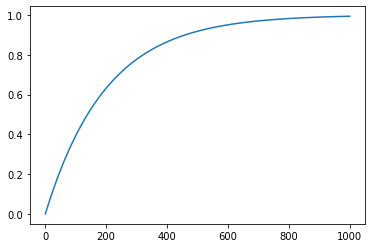

In [11]:
s = Exponential(
    sill = 1.,
    range = 200,
    nugget = 0.
)

s.plot(np.linspace(0,1000,50))

In [12]:
sc = NScaler()
sc.fit(dcp2.df()['Porosity'])
pnorm = sc.transform(dcp2.df()['Porosity'])
dcp2.add_field(pnorm, 'pnorm')
dcp2.df().describe()

,x,y,Facies,Porosity,Perm,pnorm
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,475.813149,529.692042,0.813149,0.134744,207.832368,-0.005546
std,254.277530,300.895374,0.390468,0.037745,559.359350,1.064579
min,0.000000,9.000000,0.000000,0.058548,0.075819,-6.361341
25%,300.000000,269.000000,1.000000,0.106318,3.634086,-0.713471
50%,430.000000,549.000000,1.000000,0.126167,14.908970,-0.011715
75%,670.000000,819.000000,1.000000,0.154220,71.454424,0.683694
max,990.000000,999.000000,1.000000,0.228790,5308.842566,6.361341


In [15]:
xn = np.linspace(0,1000,50)
yn = np.linspace(0,1000,50)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
cp2 = CloudPoints().from_df(dfun, x='x',y='y')
wm = s.ordinary_kriging(dcp2,cp2,v='pnorm')

df_un = wm.df()
df_un['porosity'] = sc.inverse(df_un['pnorm'])
df_un

,x,y,z,crs,pnorm,pnorm_variance,geometry,porosity
0,0.0,0.000000,None,None,-1.232367,0.380022,POINT (0.000 0.000),0.094355
0,0.0,20.408163,None,None,-1.188025,0.282221,POINT (0.000 20.408),0.095144
0,0.0,40.816327,None,None,-1.090841,0.209471,POINT (0.000 40.816),0.097025
0,0.0,61.224490,None,None,-0.953954,0.161571,POINT (0.000 61.224),0.100031
0,0.0,81.632653,None,None,-0.983092,0.136698,POINT (0.000 81.633),0.099356
...,...,...,...,...,...,...,...,...
0,1000.0,918.367347,None,None,-1.441308,0.330222,POINT (1000.000 918.367),0.089031
0,1000.0,938.775510,None,None,-1.599221,0.231901,POINT (1000.000 938.776),0.084378
0,1000.0,959.183673,None,None,-1.741151,0.142581,POINT (1000.000 959.184),0.081084
0,1000.0,979.591837,None,None,-1.753875,0.093976,POINT (1000.000 979.592),0.080826


/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:163: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  d = ax.pcolormesh(xx,yy,df.values, **kwargs)


<AxesSubplot:>

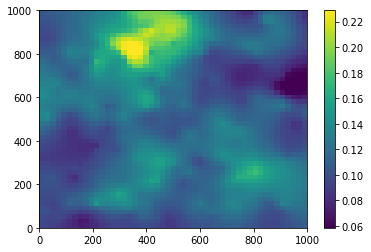

In [16]:
wm.add_fields_from_df(df_un, ['porosity'])



/Users/scuervo91/Documents/dev/volumetricspy/volumetricspy/stats/points.py:164: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(d)


<AxesSubplot:xlabel='x', ylabel='y'>

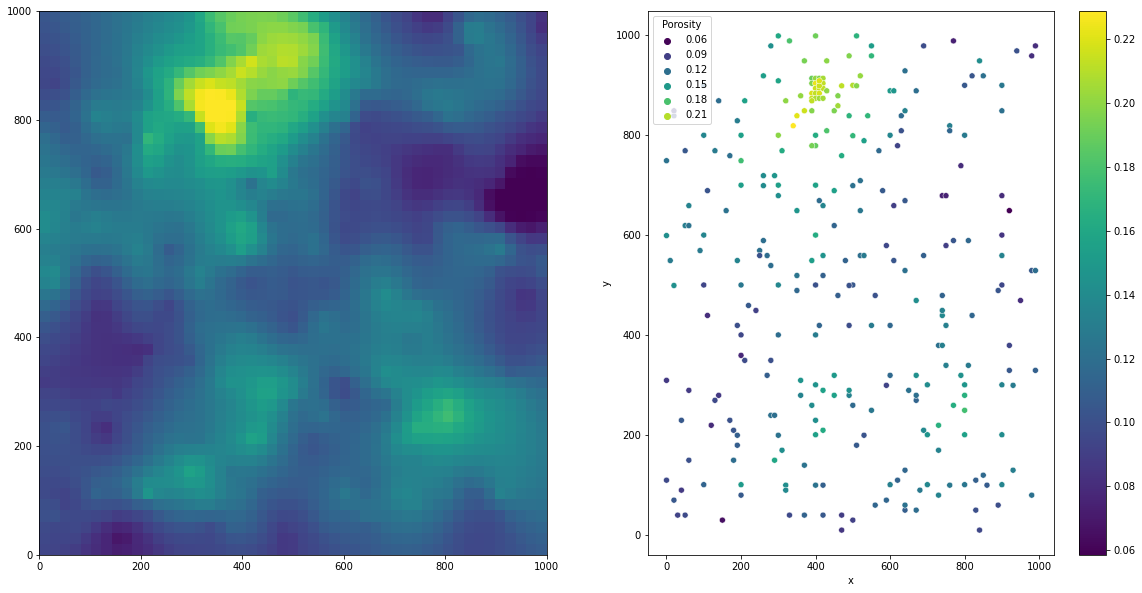

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wm.plot_mesh('porosity',ax=ax[0])
dcp2.plot(ax=ax[1], hue='Porosity', palette='viridis')

In [22]:
data=wm.df()
data.describe()

,x,y,Porosity,Porosity_variance
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,500.000000,500.000000,0.121241,0.741181
std,294.566464,294.566464,0.026453,0.381655
min,0.000000,0.000000,0.061114,0.010923
25%,244.897959,244.897959,0.102874,0.492030
50%,500.000000,500.000000,0.117637,0.688321
75%,755.102041,755.102041,0.133401,0.902873
max,1000.000000,1000.000000,0.222290,2.890865


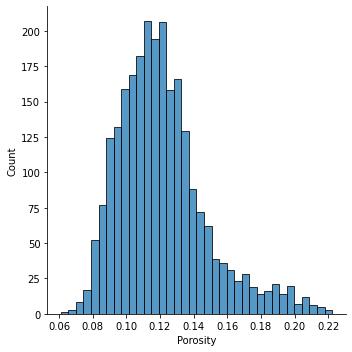

In [20]:
sns.displot(data=data.reset_index(), x='Porosity', kde=False)

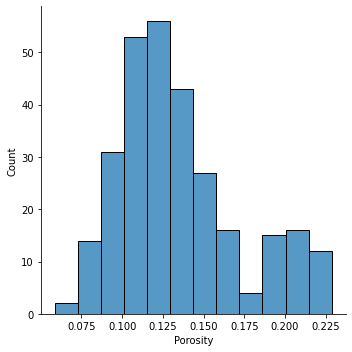

In [21]:
sns.displot(data=dcp2.df().reset_index(), x='Porosity', kde=False)